# Section 2 - EDA
## About Data
The test data for the Large Text Compression Benchmark is a record about describing the English and French Revolution which was uploaded in 2006.<br> 
**Download Linke:** [TEXT8](http://mattmahoney.net/dc/text8.zip)<br>
* File Size: 97,657 KB<br>
* Download in a zip file, and extract it in your folder.<br>
* The data is [UTF-8](https://en.wikipedia.org/wiki/UTF-8) encoded consisting primarily of English text. Text 8 contains an only one-line string that means there is not breaking command at the end of the string, and it contains 17,005,207 words. Also, there is not any punctuation on the string, therefore people can only consider words to manipulate.<br>

First, count the number of alphabet letters in this file.

In [1]:
with open('text8', 'r') as f:
        line=f.readline().strip()
        #print(line)
        ls=line.split(' ')
        print(len(ls))
        f.close()

alpha=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','j','k', 'l', 'm', 'n',\
        'o', 'p', 'q', 'r', 's','t', 'u', 'v', 'w', 'x', 'y', 'z']

print(len(alpha))
word_dict={}

for i in range(len(alpha)):
    print('Count: ', alpha[i])
    word_dict[alpha[i]]=0
    for j in range(len(line)):
        if line[j]==alpha[i]:
            word_dict[alpha[i]]=word_dict[alpha[i]]+1
print(word_dict)

17005207
26
Count:  a
Count:  b
Count:  c
Count:  d
Count:  e
Count:  f
Count:  g
Count:  h
Count:  i
Count:  j
Count:  k
Count:  l
Count:  m
Count:  n
Count:  o
Count:  p
Count:  q
Count:  r
Count:  s
Count:  t
Count:  u
Count:  v
Count:  w
Count:  x
Count:  y
Count:  z
{'a': 6606515, 'b': 1230825, 'c': 2768769, 'd': 2834157, 'e': 10662065, 'f': 1936788, 'g': 1633052, 'h': 3671291, 'i': 6538325, 'j': 165443, 'k': 486208, 'l': 3324093, 'm': 2125026, 'n': 6592507, 'o': 6537082, 'p': 1642650, 'q': 86901, 'r': 5511467, 's': 5378579, 't': 6942626, 'u': 2154957, 'v': 1006543, 'w': 1271406, 'x': 295633, 'y': 1218372, 'z': 373513}


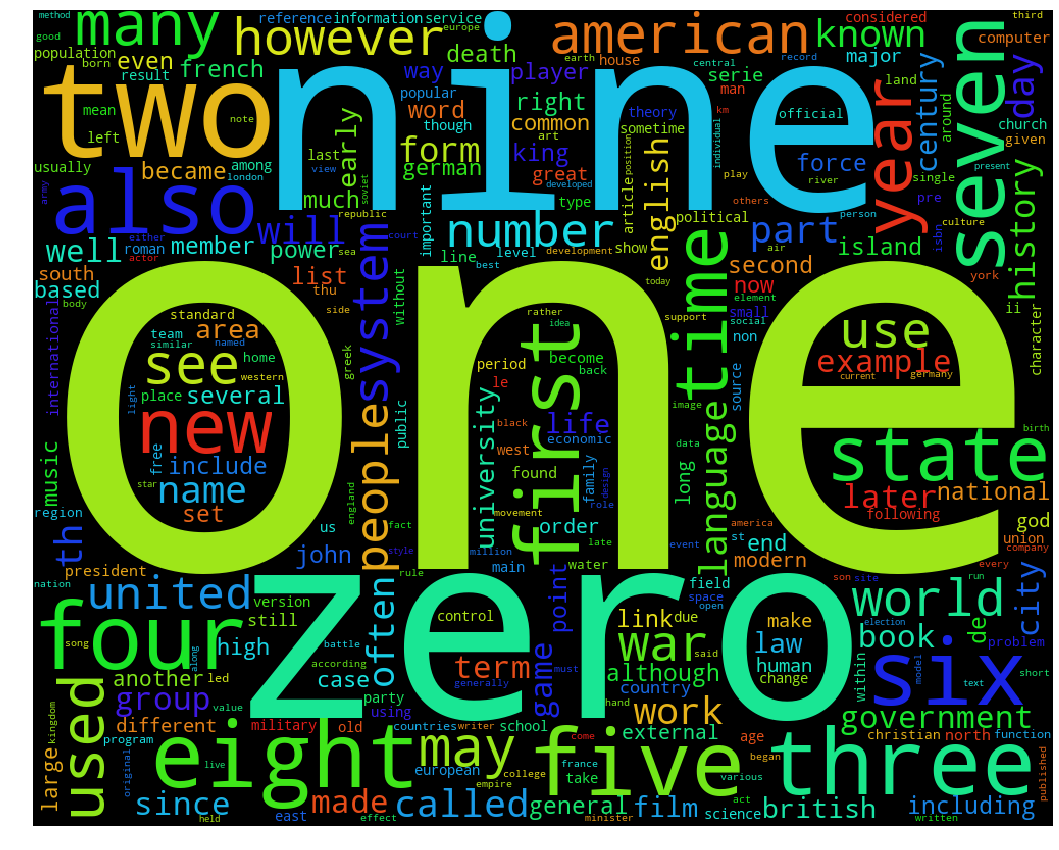

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 
with open('text8') as f:
    text = f.read()
cloud = WordCloud(width=1000, height= 800,max_words= 300).generate(text)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');


The result shows that Number of each alphabet character is:<br> {'a': 6606515, 'b': 1230825, 'c': 2768769, 'd': 2834157, 'e': 10662065, 'f': 1936788, 'g': 1633052, 'h': 3671291, 'i': 6538325, 'j': 165443, 'k': 486208, 'l': 3324093, 'm': 2125026, 'n': 6592507, 'o': 6537082, 'p': 1642650, 'q': 86901, 'r': 5511467, 's': 5378579, 't': 6942626, 'u': 2154957, 'v': 1006543, 'w': 1271406, 'x': 295633, 'y': 1218372, 'z': 373513}

In [3]:
line=line.replace(' ', '')
length_of_line=len(line)
print('The length of the string without space: ', length_of_line)

The length of the string without space:  82994793


In [19]:
print('The probability of occurrence of each letter.')
probability_ls=[]
for i in alpha:
    probability=word_dict[i]/length_of_line
    probability_ls.append(probability)
    print("The letter - "+i+", The probability is "+str(round(probability*100, 2))+"%")

The probability of occurrence of each letter.
The letter - a, The probability is 7.96%
The letter - b, The probability is 1.48%
The letter - c, The probability is 3.34%
The letter - d, The probability is 3.41%
The letter - e, The probability is 12.85%
The letter - f, The probability is 2.33%
The letter - g, The probability is 1.97%
The letter - h, The probability is 4.42%
The letter - i, The probability is 7.88%
The letter - j, The probability is 0.2%
The letter - k, The probability is 0.59%
The letter - l, The probability is 4.01%
The letter - m, The probability is 2.56%
The letter - n, The probability is 7.94%
The letter - o, The probability is 7.88%
The letter - p, The probability is 1.98%
The letter - q, The probability is 0.1%
The letter - r, The probability is 6.64%
The letter - s, The probability is 6.48%
The letter - t, The probability is 8.37%
The letter - u, The probability is 2.6%
The letter - v, The probability is 1.21%
The letter - w, The probability is 1.53%
The letter - 

In [21]:
import pandas as pd
df_dict={}
df_dict['Letter']=alpha
count_ls=[]
for i in alpha:
    count_ls.append(word_dict[i])
df_dict['Count']=count_ls
df_dict['Occurrence_Probability']=probability_ls
letter_df=pd.DataFrame.from_dict(df_dict)
print(letter_df)

   Letter     Count  Occurrence_Probability
0       a   6606515                0.079602
1       b   1230825                0.014830
2       c   2768769                0.033361
3       d   2834157                0.034149
4       e  10662065                0.128467
5       f   1936788                0.023336
6       g   1633052                0.019677
7       h   3671291                0.044235
8       i   6538325                0.078780
9       j    165443                0.001993
10      k    486208                0.005858
11      l   3324093                0.040052
12      m   2125026                0.025604
13      n   6592507                0.079433
14      o   6537082                0.078765
15      p   1642650                0.019792
16      q     86901                0.001047
17      r   5511467                0.066407
18      s   5378579                0.064806
19      t   6942626                0.083651
20      u   2154957                0.025965
21      v   1006543             

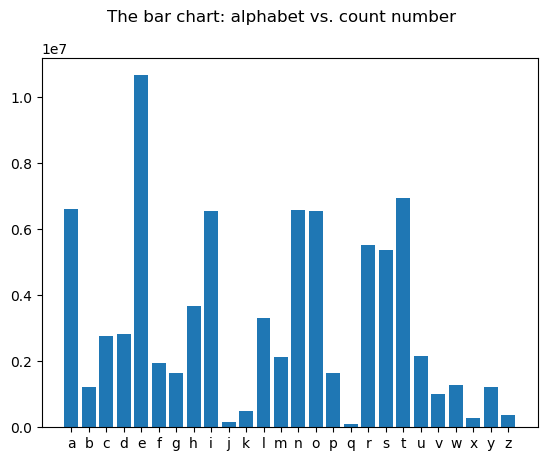

In [68]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(26)
fig, ax = plt.subplots()
fig.suptitle('The bar chart: alphabet vs. count number')
plt.bar(x, count_ls)
plt.xticks(x, alpha)
plt.show()

## Histogram Chart
* The bar chart can clearly show the number of uses of each letter in the string, and it is a very intuitive performance to the user.
* This is a technique that corresponds to a two-sample test. When people are still entangled in the intuitive sense of mean, scale, skewness, outliers, kurtosis, etc., the simple histogram of the data is very simple and obvious.
* In addition to comparing the distribution of the two variables, it can have additional usage. For example, we can draw the distribution of heights at different levels for men and women, and whether gender will have a significant impact on height.

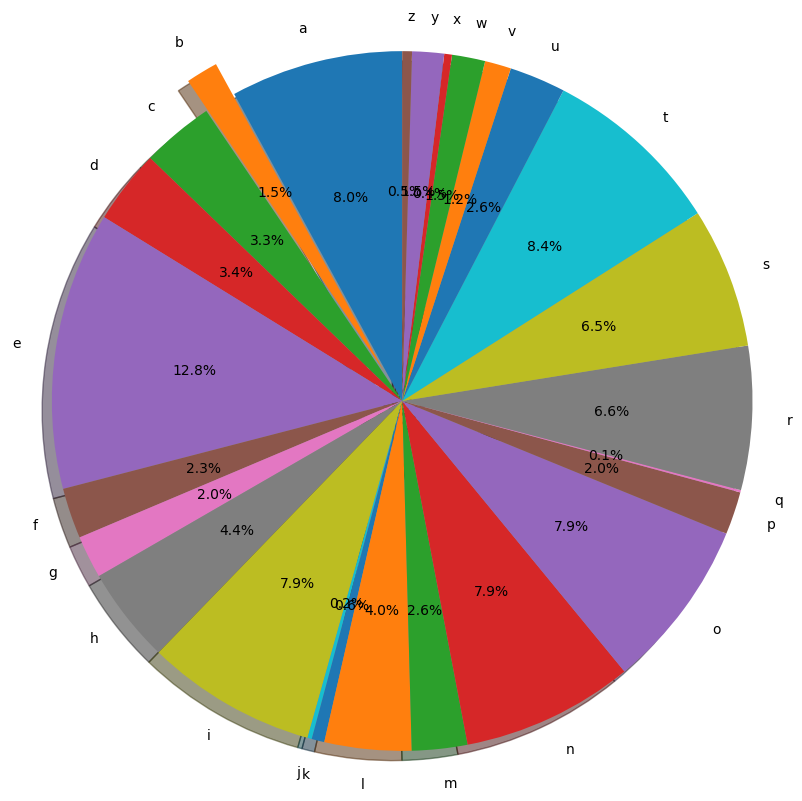

In [79]:
labels = alpha
sizes = probability_ls
explode = (0, 0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Pie Chart
* Pie charts are generally used to show percentage or proportional data and usually, the percentage represented nect to the corresponding slice of pie.<br>
* Pie chart presents data as a simple and easy-to-understand picture. It can be an effective communication tool for even an uninformed audience.

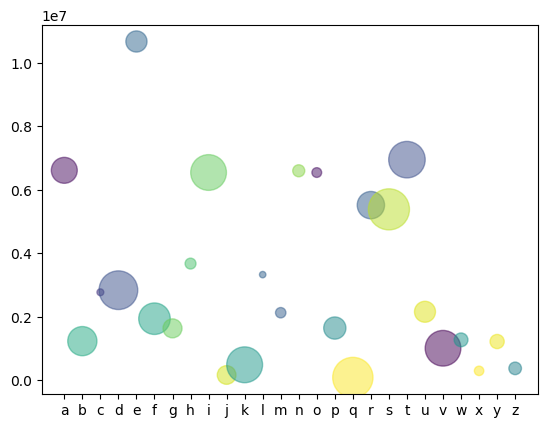

In [106]:
import numpy as np
import matplotlib.pyplot as plt

N = 26
x = alpha
y = count_ls
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [122]:
sorted_ls=sorted(count_ls)
medium=(sorted_ls[12]+sorted_ls[13])/2
print('The medium is: ', medium)

sum=0
for i in count_ls:
    sum=sum+i
mean=sum/len(count_ls)
print('The mean is: ', mean)
sum_p=0
for i in probability_ls:
    sum_p=sum_p+i
probabitily_mean=sum_p/len(probability_ls)
print('The probability mean is: ', probabitily_mean)
difference_with_mean=[]
difference_with_medium=[]
difference_with_probabitily_mean=[]
for i in count_ls:
    difference_with_medium.append(i-medium)
    difference_with_mean.append(i-mean)
for i in probability_ls:
    difference_with_probabitily_mean.append(i-probabitily_mean)
    
df_dict['Difference_with_Mean']=difference_with_mean
df_dict['Difference_with_Medium']=difference_with_medium
df_dict['Difference_with_Probabitily_Mean']=difference_with_probabitily_mean

letter_df=pd.DataFrame.from_dict(df_dict)
print(letter_df)


The medium is:  2139991.5
The mean is:  3192107.423076923
The probability mean is:  0.03846153846153845
   Letter     Count  Occurrence_Probability  Difference_with_Mean  \
0       a   6606515                0.079602          3.414408e+06   
1       b   1230825                0.014830         -1.961282e+06   
2       c   2768769                0.033361         -4.233384e+05   
3       d   2834157                0.034149         -3.579504e+05   
4       e  10662065                0.128467          7.469958e+06   
5       f   1936788                0.023336         -1.255319e+06   
6       g   1633052                0.019677         -1.559055e+06   
7       h   3671291                0.044235          4.791836e+05   
8       i   6538325                0.078780          3.346218e+06   
9       j    165443                0.001993         -3.026664e+06   
10      k    486208                0.005858         -2.705899e+06   
11      l   3324093                0.040052          1.319856e+05   

## Mean and Medium
The mean and Medium were calculated. Use the data to find the difference between mean or medium. That can help people to find the which letter is the extreme outlier or quirk.

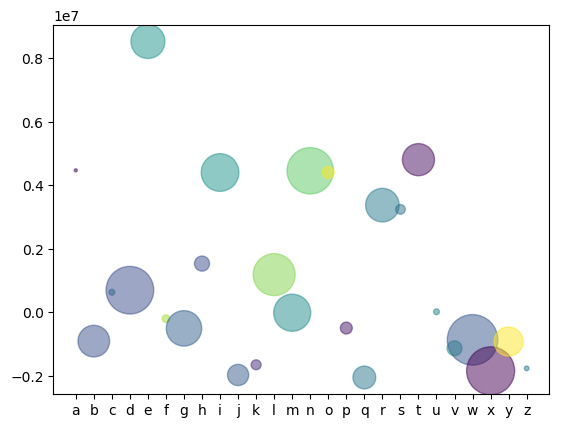

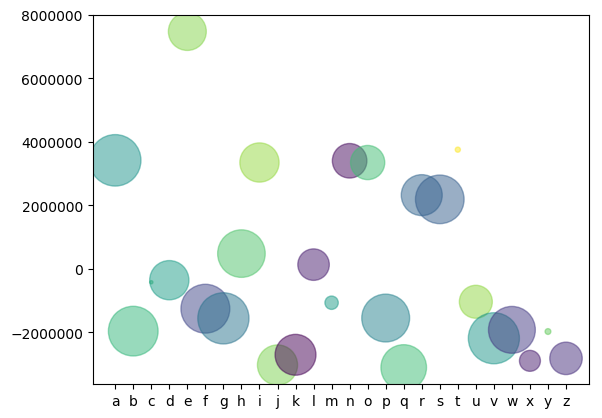

In [114]:

N = 26
x = alpha
y = difference_with_medium
colors = np.random.rand(N)
area = (40 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

N = 26
x = alpha
y = difference_with_mean
colors = np.random.rand(N)
area = (40 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### People can intuitively see that the letter e is an extreme outlier from the scatter plot. And the difference of medium or mean of letter e are extreme large that people can know from the data.

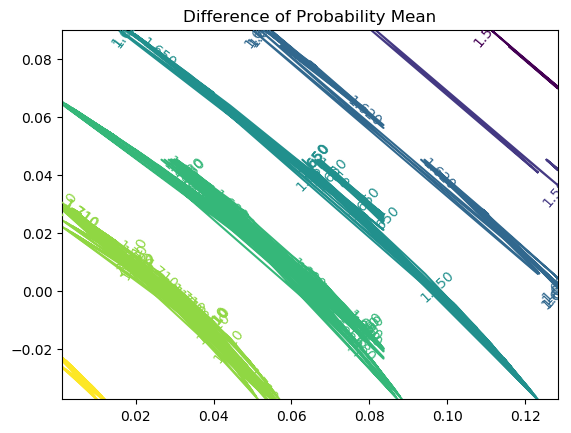

In [124]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


x = probability_ls
y = difference_with_probabitily_mean
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Difference of Probability Mean')
plt.show()

## Contour Plot
* When people have 3 variables, people can use the contour plot to observe the effect of x, y on the z variable. 
* Of course, people can choose to draw a 3D plot.

## Bootstrap Plot
* Y-coordinate: the statistic calculated from the sample that was put back into the sample
* X-coordinate: number of samples
* Bootstrap Plot simply draws each calculated sample and calculates the statistics.
* In this data, people can select a number of words to calculate the mean and draw the bootstrap plot.
* Note that bootstrap does not apply to all distributions and statistics. For example, because of the evenly distributed shape, bootstrap is not suitable for estimating the distribution of statistics that are heavily dependent on the tail, such as a domain.